# Вычисление коэффициента диффузии

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = np.genfromtxt('./msd_oxygen.out')
new_data = np.genfromtxt('./new_msd_oxygen.out')

In [24]:
print(data)

[[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.00000e+03 5.40319e-01 5.71518e-01 5.02603e-01 1.61444e+00]
 [2.00000e+03 1.25762e+00 1.19142e+00 1.24265e+00 3.69169e+00]
 ...
 [4.98000e+05 4.40870e+01 4.46208e+01 4.21519e+01 1.30860e+02]
 [4.99000e+05 4.38013e+01 4.44985e+01 4.20529e+01 1.30353e+02]
 [5.00000e+05 4.41788e+01 4.45336e+01 4.23892e+01 1.31102e+02]]


In [25]:
dr = data[:, -1]
dx = data[:, 1]
dy = data[:, 2]
dz = data[:, 3]
t = data[:, 0]

new_dr = new_data[:, -1]
new_dx = new_data[:, 1]
new_dy = new_data[:, 2]
new_dz = new_data[:, 3]
new_t = new_data[:, 0]

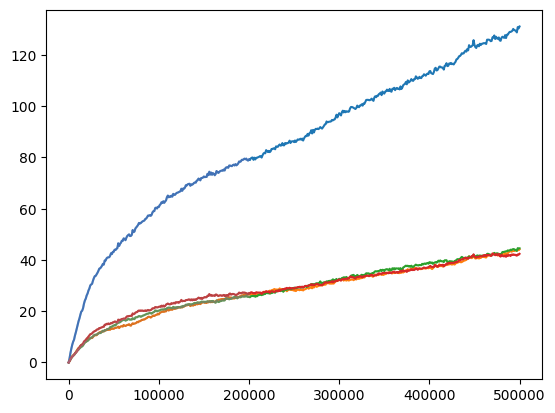

In [32]:
plt.plot(t, dr)
plt.plot(t, dx)
plt.plot(t, dy)
plt.plot(t, dz)

plt.plot(new_t, new_dr, alpha=0.3)
plt.plot(new_t, new_dx, alpha=0.3)
plt.plot(new_t, new_dy, alpha=0.3)
plt.plot(new_t, new_dz, alpha=0.3)
# plt.savefig("test_diff.png")
plt.show()


In [36]:
from scipy.stats import linregress

mask = t >= 300_000

# t_min = 0
# t_max = t[-1]
# dr_min = 0
# dr_max = dr[-1]

# for i in range(len(mask)):
#     if mask[i] == True:
#         t_min = t[i]
#         dr_min = dr[i]
#         break

# print(t_max, t_min)
# print(dr_max, dr_min)
# print((dr_max-dr_min)/(t_max-t_min)/6)

slope, _, _, _, _ = linregress(t[mask], dr[mask])
print(slope / 6)

slope_x, _, _, _, _ = linregress(t[mask], dx[mask])
slope_z, _, _, _, _ = linregress(t[mask], dz[mask])
slope_y, _, _, _, _ = linregress(t[mask], dy[mask])

print( (slope_x / 2 + slope_y / 2 + slope_z / 2) / 3)

2.8649535072163934e-05
2.864957157282893e-05
